# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "39394ea25014909e2c45b4210fe78d77f5440470"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [5]:
! wget -O options_bear_call_ladder.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/options_bear_call_ladder/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy.strategy_options_base_v2 import *\n/' options_bear_call_ladder.py

--2024-01-14 12:38:31--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/options_bear_call_ladder/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5463 (5.3K) [text/plain]
Saving to: ‘options_bear_call_ladder.py’

options_bear_call_l 100%[===================>]   5.33K  --.-KB/s    in 0s      

2024-01-14 12:38:31 (94.9 MB/s) - ‘options_bear_call_ladder.py’ saved [5463/5463]



In [6]:
from options_bear_call_ladder import OptionsBearCallLadder as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 139795,
 'strategyId': '0c691eb29f124ec9b5374a5cedfdc892'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('NIFTY BANK', exchange='NSE')
instrument

[{'id': 5669, 'value': 'NSE:NIFTY BANK'}]

## Setup Parameters

In [10]:
parameters = {
    'LEG_ONE_NUMBER_OF_STRIKES': 0,
    'LEG_ONE_STRIKE_DIRECTION': 1,
    'LEG_ONE_TRADING_SYMBOL_SUFFIX': 1,
    'LEG_ONE_TRANSACTION_TYPE': 1,
    
    'LEG_THREE_NUMBER_OF_STRIKES': 2,
    'LEG_THREE_STRIKE_DIRECTION': 0,
    'LEG_THREE_TRADING_SYMBOL_SUFFIX': 1,
    'LEG_THREE_TRANSACTION_TYPE': 2,
    
    'LEG_TWO_NUMBER_OF_STRIKES': 2,
    'LEG_TWO_STRIKE_DIRECTION': 2,
    'LEG_TWO_TRADING_SYMBOL_SUFFIX': 1,
    'LEG_TWO_TRANSACTION_TYPE': 1
}

In [11]:
initial_virtual_funds = 1450000     # in Rupees

## Backtesting

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2022-02-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530',  
    instrument='NSE:NIFTY BANK', 
    lots=10,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Options Bear Call Ladder' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Strategy Name           │ Options Bear Call Ladder               │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:NIFTY BANK']                     │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 10                                     │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp         │ 2022-02-01 09:15:00+05:30              │
├─────────────────────────┼────────────────────────────────────────┤
│ End Timestamp           │ 20

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (9)

Execution Progress:   0%|          | 0/47110500.0 [00:00<?]

In [15]:
print(logs)

[BT] [2022-02-08 09:15:00,000] [WARNING] [utils] No historical data found for candle: 2022-02-08 09:15:00+05:30 for NSE_FO:BANKNIFTY10FEB2238200CE [LOCAL] 
[BT] [2022-02-08 09:15:00,000] [INFO] [order] [PLACING NEW ORDER] [2022-02-08 09:15:00+05:30] [97517dd5204f47ba90ed54cc6618f2d3] [BUY] [NSE_FO:BANKNIFTY10FEB2238200CE] [QTY:150] [QTY PENDING: 150] [ENTRY PRICE: 325.95] [PRICE:None] [TRIGGER PRICE:None] [ORDER_TYPE_REGULAR] [ORDER_CODE_INTRADAY] [ORDER_VARIETY_MARKET] [ORDER_POSITION_ENTER]
[BT] [2022-02-08 09:15:00,000] [INFO] [order] [ORDER ID RECEIVED] [ABVIRTUALBROKER] [ID:97517dd5204f47ba90ed54cc6618f2d3] [BUY] [NSE_FO:BANKNIFTY10FEB2238200CE [LOCAL]] [Order ID: (Order: [2022-02-08 09:15:00+05:30] [97517dd5204f47ba90ed54cc6618f2d3] [BUY] [NSE_FO:BANKNIFTY10FEB2238200CE] [QTY:150] [QTY PENDING: 150] [ENTRY PRICE: 325.95] [PRICE:None] [TRIGGER PRICE:None] [ORDER_TYPE_REGULAR] [ORDER_CODE_INTRADAY] [ORDER_VARIETY_MARKET] [ORDER_POSITION_ENTER])
Status History: PUT ORDER REQ RECEIVE

### Stop

In [21]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, country='India')
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                   NFO  BANKNIFTY03FEB2238700CE 2022-02-01 09:15:00+05:30   
1                   NFO  BANKNIFTY03FEB2238700CE 2022-02-01 09:15:00+05:30   
2                   NFO  BANKNIFTY03FEB2238500CE 2022-02-01 09:15:00+05:30   
3                   NFO  BANKNIFTY03FEB2239000CE 2022-02-02 09:15:00+05:30   
4                   NFO  BANKNIFTY03FEB2239000CE 2022-02-02 09:15:00+05:30   
5                   NFO  BANKNIFTY03FEB2238800CE 2022-02-02 09:15:00+05:30   
6                   NFO  BANKNIFTY03FEB2239500CE 2022-02-03 09:15:00+05:30   
7                   NFO  BANKNIFTY03FEB2239500CE 2022-02-03 09:15:00+05:30   
8                   NFO  BANKNIFTY03FEB2239300CE 2022-02-03 09:15:00+05:30   
9                   NFO  BANKNIFTY10FEB2239300CE 2022-02-04 09:15:00+05:30   
10                  NFO  BANKNIFTY10FEB2239300CE 2022-02-04 09:15:00+05:30   
11                  NFO  BANKNIFTY10FEB2239100CE 2022-02-04 09:15:00+05:30   
12                  NFO  BANKNIFTY10FEB2238800CE 2022-02-07 09:15:00+05:30   
13                  NFO  BANKNIFTY10FEB2238800CE 2022-02-07 09:15:00+05:30   
14                  NFO  BANKNIFTY10FEB2238600CE 2022-02-07 09:15:00+05:30   
15                  NFO  BANKNIFTY10FEB2238400CE 2022-02-08 09:15:00+05:30   
16                  NFO  BANKNIFTY10FEB2238400CE 2022-02-08 09:15:00+05:30   
17                  NFO  BANKNIFTY10FEB2238200CE 2022-02-08 09:15:00+05:30   
18                  NFO  BANKNIFTY10FEB2238500CE 2022-02-09 09:15:00+05:30   
19                  NFO  BANKNIFTY10FEB2238500CE 2022-02-09 09:15:00+05:30   
20                  NFO  BANKNIFTY10FEB2238300CE 2022-02-09 09:15:00+05:30   
21                  NFO  BANKNIFTY10FEB2239000CE 2022-02-10 09:15:00+05:30   
22                  NFO  BANKNIFTY10FEB2239000CE 2022-02-10 09:15:00+05:30   
23                  NFO  BANKNIFTY10FEB2238800CE 2022-02-10 09:15:00+05:30   
24                  NFO  BANKNIFTY17FEB2238800CE 2022-02-11 09:15:00+05:30   
25                  NFO  BANKNIFTY17FEB2238800CE 2022-02-11 09:15:00+05:30   
26                  NFO  BANKNIFTY17FEB2238600CE 2022-02-11 09:15:00+05:30   
27                  NFO  BANKNIFTY17FEB2237900CE 2022-02-14 09:15:00+05:30   
28                  NFO  BANKNIFTY17FEB2237900CE 2022-02-14 09:15:00+05:30   
29                  NFO  BANKNIFTY17FEB2237700CE 2022-02-14 09:15:00+05:30   
30                  NFO  BANKNIFTY17FEB2237200CE 2022-02-15 09:15:00+05:30   
31                  NFO  BANKNIFTY17FEB2237200CE 2022-02-15 09:15:00+05:30   
32                  NFO  BANKNIFTY17FEB2237000CE 2022-02-15 09:15:00+05:30   
33                  NFO  BANKNIFTY17FEB2238500CE 2022-02-16 09:15:00+05:30   
34                  NFO  BANKNIFTY17FEB2238500CE 2022-02-16 09:15:00+05:30   
35                  NFO  BANKNIFTY17FEB2238300CE 2022-02-16 09:15:00+05:30   
36                  NFO  BANKNIFTY17FEB2238200CE 2022-02-17 09:15:00+05:30   
37                  NFO  BANKNIFTY17FEB2238200CE 2022-02-17 09:15:00+05:30   
38                  NFO  BANKNIFTY17FEB2238000CE 2022-02-17 09:15:00+05:30   
39                  NFO  BANKNIFTY24FEB2237500CE 2022-02-18 09:15:00+05:30   
40                  NFO  BANKNIFTY24FEB2237500CE 2022-02-18 09:15:00+05:30   
41                  NFO  BANKNIFTY24FEB2237300CE 2022-02-18 09:15:00+05:30   
42                  NFO  BANKNIFTY24FEB2237600CE 2022-02-21 09:15:00+05:30   
43                  NFO  BANKNIFTY24FEB2237600CE 2022-02-21 09:15:00+05:30   
44                  NFO  BANKNIFTY24FEB2237400CE 2022-02-21 09:15:00+05:30   
45                  NFO  BANKNIFTY24FEB2237000CE 2022-02-22 09:15:00+05:30   
46                  NFO  BANKNIFTY24FEB2237000CE 2022-02-22 09:15:00+05:30   
47                  NFO  BANKNIFTY24FEB2236800CE 2022-02-22 09:15:00+05:30   
48                  NFO  BANKNIFTY24FEB2237800CE 2022-02-23 09:15:00+05:30   
49                  NFO  BANKNIFTY24FEB2237800CE 2022-02-23 09:15:00+05:30   
50                  NFO  BA

### Statistics Reports

#### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2022-02-01
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   -41.29%
CAGR﹪              -30.0%

Sharpe              -0.14
Prob. Sharpe Ratio  43.22%
Sortino             -0.23
Sortino/√2          -0.16
Omega               0.98

Max Drawdown        -50.01%
Longest DD Days     318

Gain/Pain Ratio     -0.02
Gain/Pain (1M)      -0.17

Payoff Ratio        1.38
Profit Factor       0.98
Common Sense Ratio  1.28
CPC Index           0.56
Tail Ratio          1.31
Outlier Win Ratio   3.9
Outlier Loss Ratio  3.18

MTD                 0.16%
3M                  -7.16%
6M                  -15.86%
YTD                 -37.07%
1Y                  -29.81%
3Y (ann.)           -30.0%
5Y (ann.)           -30.0%
10Y (ann.)          -30.0%
All-time (ann.)     -30.0%

Avg. Drawdown       -25.48%
Avg. Drawdown Days  135
Recovery Factor     -0.83
Ulcer Index         0.29
Serenity 

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2022-02-01
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -41.29%
CAGR﹪                     -30.0%

Sharpe                     -0.14
Prob. Sharpe Ratio         43.22%
Smart Sharpe               -0.1
Sortino                    -0.23
Smart Sortino              -0.15
Sortino/√2                 -0.16
Smart Sortino/√2           -0.11
Omega                      0.98

Max Drawdown               -50.01%
Longest DD Days            318
Volatility (ann.)          72.9%
Calmar                     -0.6
Skew                       0.89
Kurtosis                   2.17

Expected Daily %           -0.14%
Expected Monthly %         -2.92%
Expected Yearly %          -23.38%
Kelly Criterion            -1.04%
Risk of Ruin               0.0%
Daily Value-at-Risk        -7.59%
Expected Shortfall (cVaR)  -7.59%

Max Consecutive 

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-09-16  2023-07-17  2023-07-31   318    -50.006932        -48.827483
2  2022-02-17  2022-06-24  2022-09-15   210    -34.220891        -33.738047
3  2022-02-04  2022-02-15  2022-02-16    12    -11.962961         -7.320914
4  2022-02-02  2022-02-02  2022-02-03     1     -5.720929          0.000000

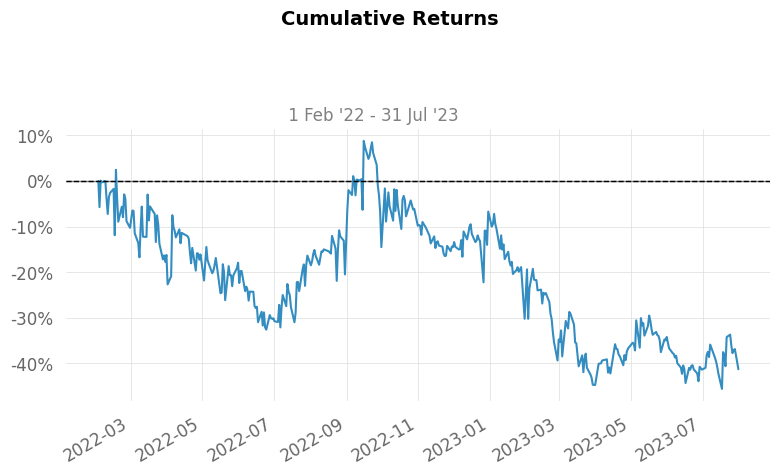

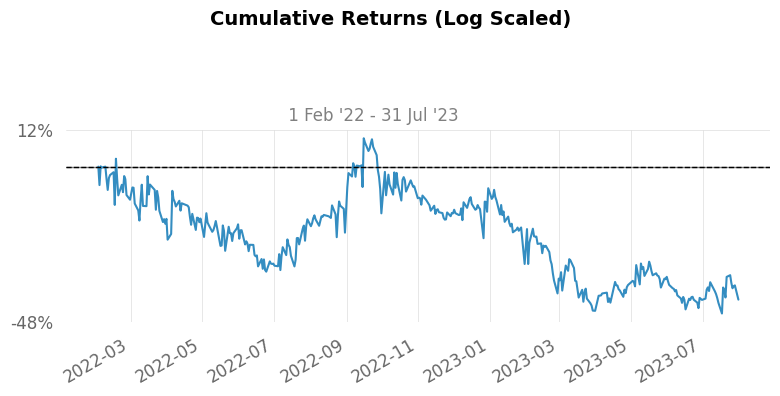

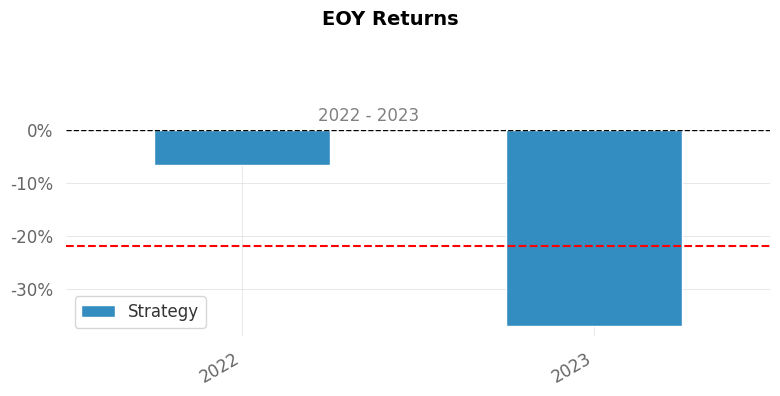

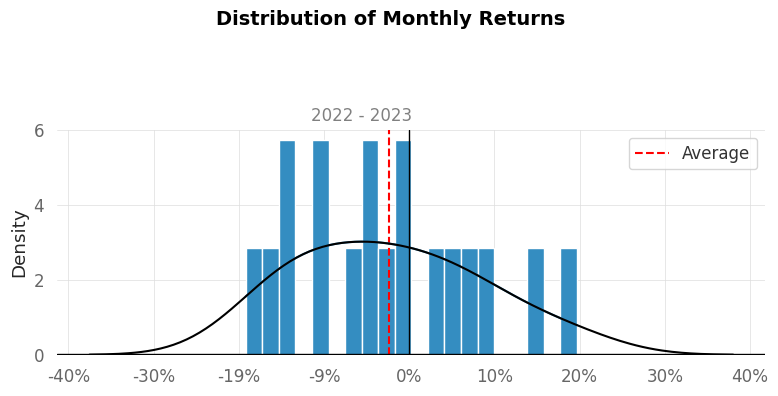

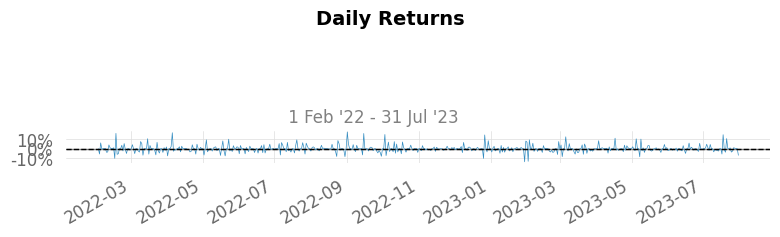

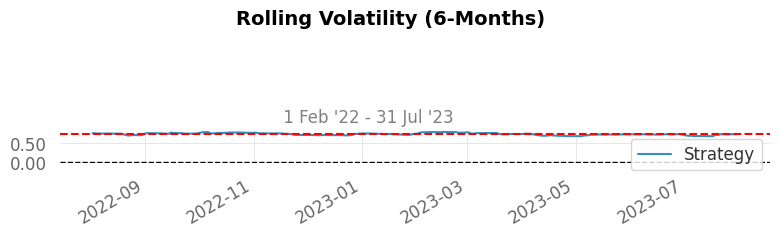

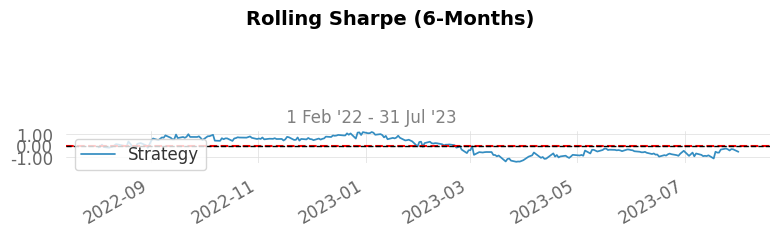

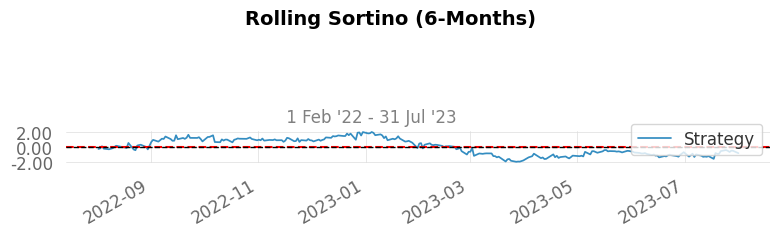

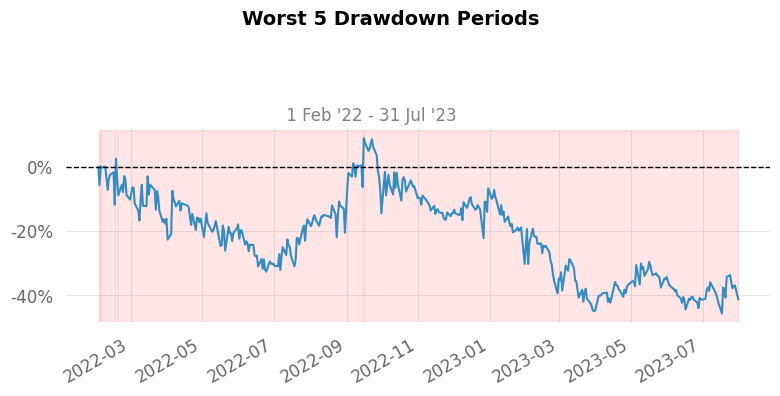

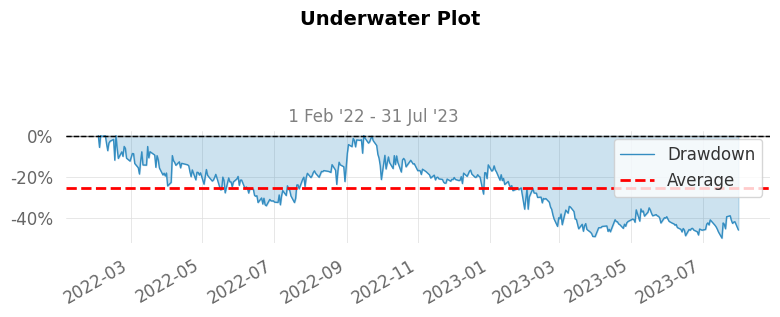

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


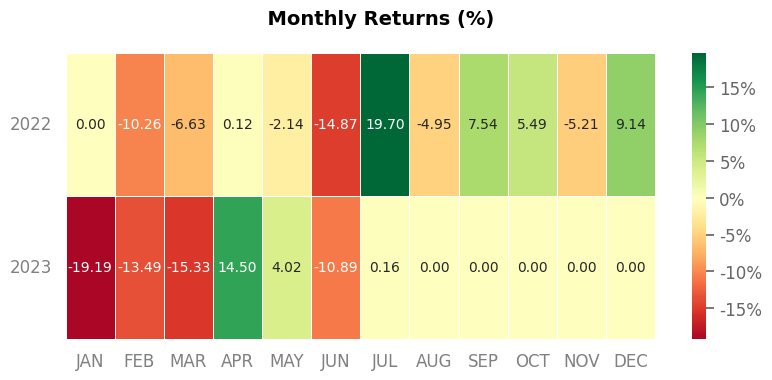

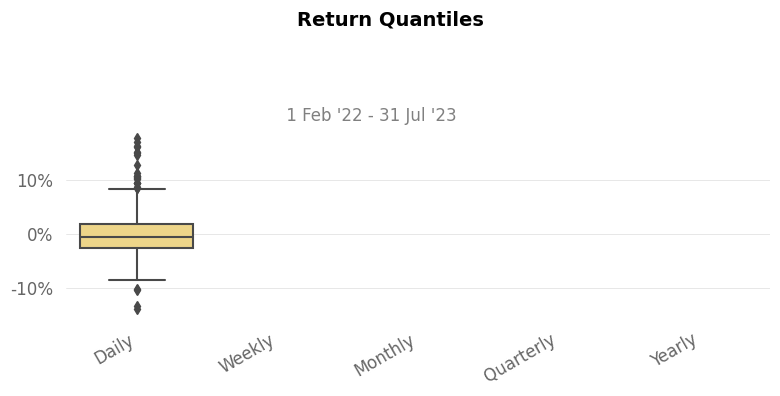

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 57c20b80232346b6b79bf3a1ac7c4e73 |
| Transaction Type | BUY                              |
| Instrument       | NSE:BANKNIFTY03AUG2345700CE      |
| Quantity         | 150                              |
| Price            | ₹191.7                           |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2024-01-14T07:13:39.785528Z | COMPLETE               |
| 2024-01-14T07:13:39.785491Z | OPEN                   |
| 2024-01-14T07:13:39.785474Z | OPEN PENDING           |
| 2024-01-14T07:13:39.785455Z | VALIDATION PENDING     |
| 2024-01-14T07:13:39.785416Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | c606eb5024e542088

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---

## Live Trading (Real Trading)

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 +0530', 
    end='15:00 +0530', 
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)